In [4]:
import requests
import polars as pl
from datetime import datetime
import os
from dotenv import load_dotenv
from io import StringIO
import matplotlib.pyplot as plt

from src.ingestion.fetch_prices import fetch_corn_prices

In [5]:
load_dotenv()

True

In [6]:
api_key = os.getenv("ALPHA_VANTAGE_API_KEY")
url = 'https://www.alphavantage.co/query'
params = {
    'function': 'CORN',
    'interval': 'monthly',
    'datatype': 'csv',
    'apikey': api_key,
}
response = requests.get(url, params=params)
csv_data = response.text

df = pl.read_csv(
    StringIO(csv_data),
    try_parse_dates=True,
    null_values=[".", "", "NA", "N/A", "null"],  # Treat these as null
)

print(df)

shape: (546, 2)
┌────────────┬────────────┐
│ timestamp  ┆ value      │
│ ---        ┆ ---        │
│ date       ┆ f64        │
╞════════════╪════════════╡
│ 2025-06-01 ┆ 195.719077 │
│ 2025-05-01 ┆ 204.808448 │
│ 2025-04-01 ┆ 215.569093 │
│ 2025-03-01 ┆ 207.751691 │
│ 2025-02-01 ┆ 221.254544 │
│ …          ┆ …          │
│ 1980-05-01 ┆ null       │
│ 1980-04-01 ┆ null       │
│ 1980-03-01 ┆ null       │
│ 1980-02-01 ┆ null       │
│ 1980-01-01 ┆ null       │
└────────────┴────────────┘


In [8]:
df_clean = df.drop_nulls()
print(df_clean)

shape: (426, 2)
┌────────────┬────────────┐
│ timestamp  ┆ value      │
│ ---        ┆ ---        │
│ date       ┆ f64        │
╞════════════╪════════════╡
│ 2025-06-01 ┆ 195.719077 │
│ 2025-05-01 ┆ 204.808448 │
│ 2025-04-01 ┆ 215.569093 │
│ 2025-03-01 ┆ 207.751691 │
│ 2025-02-01 ┆ 221.254544 │
│ …          ┆ …          │
│ 1990-05-01 ┆ 121.254097 │
│ 1990-04-01 ┆ 118.498337 │
│ 1990-03-01 ┆ 109.837318 │
│ 1990-02-01 ┆ 106.294167 │
│ 1990-01-01 ┆ 105.900513 │
└────────────┴────────────┘


In [9]:
print(df_clean['timestamp'].min())
print(df_clean['timestamp'].max())

1990-01-01
2025-06-01


In [10]:
df_5_years = df_clean.filter(pl.col('timestamp') >= datetime(2020, 6, 1))
print(df_5_years)

shape: (61, 2)
┌────────────┬────────────┐
│ timestamp  ┆ value      │
│ ---        ┆ ---        │
│ date       ┆ f64        │
╞════════════╪════════════╡
│ 2025-06-01 ┆ 195.719077 │
│ 2025-05-01 ┆ 204.808448 │
│ 2025-04-01 ┆ 215.569093 │
│ 2025-03-01 ┆ 207.751691 │
│ 2025-02-01 ┆ 221.254544 │
│ …          ┆ …          │
│ 2020-10-01 ┆ 186.766388 │
│ 2020-09-01 ┆ 166.602534 │
│ 2020-08-01 ┆ 149.393    │
│ 2020-07-01 ┆ 152.58762  │
│ 2020-06-01 ┆ 148.04238  │
└────────────┴────────────┘


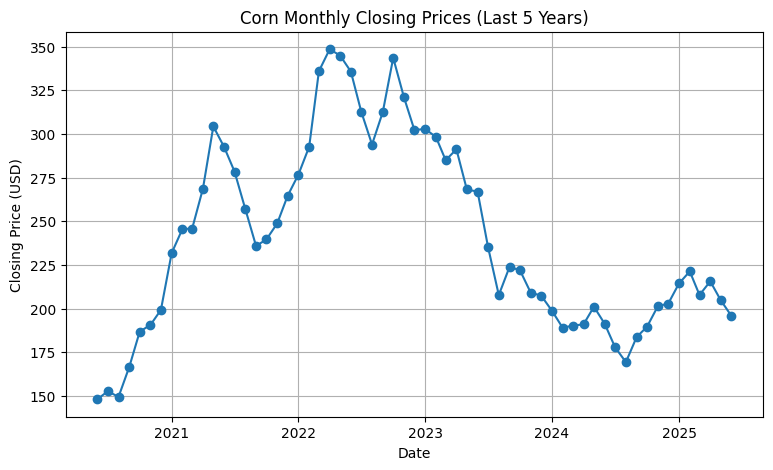

In [11]:
df_pd = df_5_years.to_pandas()
plt.figure(figsize=(9, 5))
plt.plot(df_pd['timestamp'], df_pd['value'], marker='o')
plt.title('Corn Monthly Closing Prices (Last 5 Years)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()


In [3]:
df_corn = fetch_corn_prices(interval='monthly', years_back=5)
print(df_corn)

Fetching corn price data from Alpha Vantage...
Data fetched successfully.
shape: (54, 2)
┌────────────┬────────────┐
│ date       ┆ value      │
│ ---        ┆ ---        │
│ date       ┆ f64        │
╞════════════╪════════════╡
│ 2021-01-01 ┆ 231.754461 │
│ 2021-02-01 ┆ 245.554057 │
│ 2021-03-01 ┆ 245.760357 │
│ 2021-04-01 ┆ 268.622449 │
│ 2021-05-01 ┆ 304.29755  │
│ …          ┆ …          │
│ 2025-02-01 ┆ 221.254544 │
│ 2025-03-01 ┆ 207.751691 │
│ 2025-04-01 ┆ 215.569093 │
│ 2025-05-01 ┆ 204.808448 │
│ 2025-06-01 ┆ 195.719077 │
└────────────┴────────────┘
